<a href="https://colab.research.google.com/github/yywest/A-guide-to-Machine-Learning-in-R/blob/master/testBnk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import neighbors
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [90]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/banking_portu.csv',header=0)                             
data = data.dropna()
print(data.shape)                                                                            # show umber of total rows & columns
print(list(data.columns))
orgData = data                                                                               # for test original dataset      

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [0]:
print('orgData.columns = ',orgData.columns)                                    # print all col. in orgData and end with detail dtype= 'object'
print('Total rows of orgData = len(orgData) =  ',len((orgData)))         # print total rows of orgData
print('orgData.columns = ',len(list(orgData.columns)))                       # print(len(list(orgData))) 
print('orgData =' ,orgData)
print('job & education = ' ,orgData[['job','education']])                       # print only 2 cols (specific columns)

In [0]:
data.head()                                                                                   # show sample data column name and contain data ; data.head(2) show 2 rows

In [0]:
data.info()                                                                                  # show number of total rows in every  column and data type

In [0]:
data.describe                                                               # show data in every  rows 

In [0]:
data.describe ()                                                           # describe statistic value of ecah column

In [0]:
data['education'].unique()                                             #  Categories of education ; array(['basic.4y', 'unknown', 'university.degree', 'basic.6y',...], dtype=object)

In [0]:
# Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.
# Reduce education group ; group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”
#-----------------------------------------------------------------------------------------------------------
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
#-----------------------------------------------------------------------------------------------------------
# after grouping these columns  ; education group =  array(['basic', 'unknown', 'university.degree', 'high.school', 'professional.course', 'illiterate'], dtype=object)

In [0]:
data['education'].unique()

In [0]:
data['education'].value_counts()                             # show total rows of each category in education column  and data type                    

In [0]:
# Data exploration
data['y'].value_counts()

In [0]:
sns.countplot(x='y',data=data, palette='hls')               # palette='hls' about chart colors
plt.show()
plt.savefig('count_plot')                                             # show  detail   <Figure size 432x288 with 0 Axes>

In [0]:
count_no_sub = len(data[data['y'] == 0])                 # count client not subcription   ; y value = 0
count_sub = len(data[data['y'] == 1])                      # count client subcription         ; y value = 1
#print(count_no_sub)                                             # 36548
#print(count_sub)                                                  # 4640

In [97]:
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)          # 0.8873458288821987
print("percentage of no subscription is", pct_of_no_sub*100)         # Percentage of no subscription is  88.73458288821988

percentage of no subscription is 88.73458288821988


In [98]:
pct_of_sub = count_sub/(count_no_sub+count_sub)                    # 0.11265417111780131
print("percentage of subscription", pct_of_sub*100)                      # Percentage of  subscription is  11.265417111780131j

# 'y' is imblalance ratio of no-subscription to subscription instances is 89:11 Before we go ahead to balance the classes, let’s do some more exploration.

percentage of subscription 11.265417111780131


In [0]:
data.groupby('y').mean()                                                            # summary & calculate mean of each feature separate by  y = 0 and y =1 

In [0]:
data.groupby('job').mean()

In [0]:
data.groupby('marital').mean()

In [0]:
data.groupby('education').mean()

In [0]:
#Visualizations

%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')                                # The frequency of purchase of the deposit depends a great deal on the job title
plt.savefig('purchase_fre_job')

# job title can be a good predictor of the outcome variable.

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [0]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')                                                                      #The marital status does not seem a strong predictor for the outcome variable.

The marital status does not seem a strong predictor for the outcome variable.

In [0]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

In [0]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')
#Day of week may not be a good predictor of the outcome.

In [0]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

# Month might be a good predictor of the outcome variable

Month might be a good predictor of the outcome variable.


In [0]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')                                      # Most of the customers of the bank in this dataset are in the age range of 30–40.

Most of the customers of the bank in this dataset are in the age range of 30–40.


In [0]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')                                     # Poutcome seems to be a good predictor of the outcome variable.

Poutcome seems to be a good predictor of the outcome variable.


In [0]:
print(data)

In [0]:
####-------------------This section is test run data -------------------------- ####
for var in dummy_list :
     dum_var = 'var' + '_' + var                                                       #001  ; var_job,var_marital,var_education,...,var_day_of_week,var_poutcome, more description above
     print('dum_var = ', dum_var)
     dum_var = pd.get_dummies(data[var],prefix=var)                      #002  ; create new dummy column that column name begin with the original name  and fill the content data ; get category in the main column
     print('dum_var_data  = ', dum_var)
     data_join = data.join(dum_var)
     print('dataJoin = ',data_join)
     data   = data_join
#cat_vars   =['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']    
#data_vars = data.columns.values.tolist()
#to_keep = [i for i in data_vars if i not in cat_vars]

####-------------------This sectionn is test run data -------------------------- ####

In [0]:
#Create DUMMY variables 
#That is variables with only two values, zero and one.

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


In [0]:
print('data_vars = ',data_vars)
print('len data_vars = data.columns = ',len(data_vars))
print('data now = ',len(data.columns.values))

In [0]:
print('len to_keep = ',len(to_keep))
print('to_keep = ',to_keep)
#print(orgData[['job','education']])

In [0]:
# Our final data columns will be:
# ----------------------------------------
data_final=data[to_keep]
data_final.columns.values
# ----------------------------------------

In [0]:
print('data_final Col.= to_keep = ', len(data_final.columns.values))        # Not include 10 col. main dummy 

In [0]:
#-----------------------     Sample Command    --------------------------------

data_final.loc[:3,'age' : 'pdays']                                             # show 0-3 (4 rows data) of col. AGE  to PDAYS(age,duration,campaign,pdays)
data_final.loc[[1,4,7],['age','pdays']]                                      # show data in row no. 1,4 and 7 of col.age and col. pdays
data.loc[(data['age'] > 91) & (data['education'] == 'basic')]     # show all row & col. of  age > 91 AND education = basic
data.loc[(data['education'].str.contains('p'))]    
data.loc[(data['marital'].str.contains('gle'))]     
data.loc[(data['education'].str.contains('f'))  |  (data['job'].str.contains('tec')) ]      # show OR condition
data.loc[5:10,data.columns=='y']                                          # show data row 5-10 only column 'y'

#-----------------------     Sample Command    --------------------------------

In [0]:
# select columns
#------------------------------------------------------------------
X = data_final.loc[:, data_final.columns != 'y']                 # X = data 61 col. except 'y'  41188 rows
y = data_final.loc[:, data_final.columns == 'y']                # y  = data 1 col. only 'y'       41188 rows
#------------------------------------------------------------------
print ('X = ',X)
print ('y = ',y)
print(X[['age', 'job_admin.', 'marital_single', 'education_Basic', 'education_high.school']])

In [0]:
# Over sampling ; SMOTE in python (Synthetic Minority Oversampling Technic)
# with our training data created, I'll up-sample the no-subscription using the smote algorthm
# At a high level,SMOTE:
#1. Works by creating synthetic samples from the minor class (no-subscription) instread of creating copies
#2.Randomly choosing one of the k-nearest-neighbors and  using it to create a similar.but randomly tweaked, new observations.

In [0]:
# Synthetic Minority Oversampling Technique
#---------------------------------------------------------
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)                                           # SMOTE(k_neighbors=5, kind='deprecated', ... ,svm_estimator='deprecated')
#--------------------------------------------------------- 
print('os = ',os)

In [0]:
# *** Split original data  to  train & test 
#
#--------------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)                 # split train test = 70:30
columns = X_train.columns                                                                                                     # X_train.columns = 61 col.
#--------------------------------------------------------------------------------------------------------------
# 
print('X_train = ' ,X_train)                      #28831  61 col,     all 41188 ; 41188 * 70% = 28831.6
print('X_test = ' ,X_test)                        #12357   61 col.                    41188 * 30% = 12356.4
print('y_train = ' ,y_train)                      #28831     1 col.
print('y_test = ' ,y_test)                        #12357
print('columns  = ' ,columns)                 #col.name  61
print('len columns. = X_train.columns = ', len(columns))

# *** Train data : real data X_train = 28831  rows
# *** Test data  : real data X_test  = 12357  rows
# ***       Total  : real data            = 41188  rows


In [0]:
# -------------  Make the over sampling data fit to Train data ;  use  Fx.  .fit_sample  ----------- **** 
# ***  Generate Over Sampling data   ;  code aleready above
# ***  from imblearn.over_sampling import SMOTE
# ***  os = SMOTE(random_state=0)

# ***  Make the over sampling data fit to train data ;  use  Fx.  .fit_sample    *************
# ***  and  generate over sampling data from input real data X_train, y_train  ( 28831 rows)   
# ***  os_data_X  = real train data (X) + generate new over sampling data X  ( 51134 rows)
# ***  os_data_y  = real train data (y) + generate  new over sampling data y  ( 51134 rows)
# ***  Data in os_data_X  will be transform to some what values  etc ;3.00000000e+02, floating point or else
# b4 called os.fit      ;  X_train  rows  = 28831, y_train = 28831

#----------------------------------------------------------------------
os_data_X, os_data_y = os.fit_sample(X_train, y_train)                                 
#-----------------------------------------------------------------------
#  
print('Original X_train = ',len(X_train),' rows ' , '  , y_train = ', len(y_train), ' rows')      #     X_train  =  28831  rows   , y_train =  28831   rows
                                                                                                                
print('Over sampling len os_data_X  = ',len(os_data_X), 'rows')       # after process function  os.fit_sample ;  os_data_x  =  51134 rows (gen. over sampling)
print('Over sampling len os_data_y  = ',len(os_data_y), 'rows')        # after process function  os.fit_sample ;  os_data_y  =  51134 rows
                                                                                                 # The Over samling data, generate the data with (average or some what value) values in each column
print('os_data_X    = ',os_data_X)                                                 # print data ; os_data_X
                               
print('os_data_y    = ',os_data_y)                                                 # print data ; os_data_y


In [113]:
# os_data_X ;  call Fx. pd.DataFrame --> content data converse to normal number (can understand (decimal, integer))

#--------------------------------------------------------------------------------
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )                 # os_data_X   call Fx. pd.DataFrame content data converse to normal number (easy understanding)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])                          # os_data_y   call Fx. pd.DataFrame 
#--------------------------------------------------------------------------------
print('os_data_X = ',os_data_X)                                                               
print('os_data_y = ',os_data_y)
# print(os_data_X[['age', 'job_admin.', 'marital_single', 'education_Basic', 'education_high.school']])
print('len os_dat_X   = ',len(os_data_X), 'rows')                                           #  len os_dat_X   =  51134 rows
print('len os_data_y  = ',len(os_data_y), 'rows')                                           #  len os_data_y  =  51134 rows

print('os_data_y.columns.values = ',len(os_data_y.columns.values))              # os_data_y.columns.values =  1
print('os_data_X.columns.values = ',len(os_data_X.columns.values))             # os_data_X.columns.values =  61

os_data_X =               age    duration  ...  poutcome_nonexistent  poutcome_success
0      31.000000  259.000000  ...              0.000000               0.0
1      44.000000  300.000000  ...              1.000000               0.0
2      43.000000  134.000000  ...              1.000000               0.0
3      35.000000  169.000000  ...              1.000000               0.0
4      33.000000  255.000000  ...              0.000000               0.0
...          ...         ...  ...                   ...               ...
51129  43.895499  215.134247  ...              1.000000               0.0
51130  79.886325  157.992895  ...              1.000000               0.0
51131  27.179033  101.672569  ...              0.000000               1.0
51132  36.093185  716.000000  ...              1.000000               0.0
51133  69.455358  142.406248  ...              0.772321               0.0

[51134 rows x 61 columns]
os_data_y =         y
0      0
1      0
2      0
3      0
4      0
...  

In [114]:
print("length of oversampled data is ",len(os_data_X))                                                                                                 #  len os_dat_X   =  51134 rows
print('Number of no subscription in oversampled data ', len(os_data_y[os_data_y['y'] == 0] ))                                         # 25567
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))                                                                               #  25567
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))       #  25567 / 51134  = 0.5
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))            #  25567 / 51134  = 0.5

length of oversampled data is  51134
Number of no subscription in oversampled data  25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [0]:
# Duplicate code ;  Do not run this srction  for simplify looking
#Over-sampling using SMOTE
# Summary code ; generate  over sampling data (content data are not in easy format) 
#                         adjust porpotion of train data to fit over sampling data  (os.fit_sample(...) ) 
#                         pd.DataFrame(...)  tranfrom data to nornal format easy understanding) 
X = data_final.loc[:, data_final.columns != 'y']                 # X = 61 col. except 'y'
y = data_final.loc[:, data_final.columns == 'y']                # y  = 1 col. only 'y'

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [0]:
# Recursive Feature Elimination (RFE)
# is based on the idea to repeatedly construct a model and choose either the best or worst performing feature
# The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [115]:
#------------------------------------------------------------------
data_final_vars=data_final.columns.values.tolist()         
#-------------------------------------------------------------------
print(data_final_vars)                                             # data_final_vars = 62 members  ['age', 'duration', 'campaign', 'pdays',..,'y',... 'poutcome_success']
print(len(data_final_vars))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutco

In [116]:
y = 'y'
X=[i for i in data_final_vars if i not in y]
print('len X = ',len(X),',' ,'X  = ',X)                                # len X =  61 X  =  ['age', 'duration', 'campaign', ..., 'poutcome_success'] except 'y'

len X =  61 , X  =  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_fa

In [117]:
#-------------------------------------------------------------------
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#--------------------------------------------------------------------
print('logreg = ',logreg)

logreg =  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [118]:
rfe = RFE(logreg, 20)
print (rfe)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)


In [119]:
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print('rfe = ',rfe)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


rfe =  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)


In [0]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False False False  True False
 False  True False  True False False  True False False False False False
 False False  True False False False False False False  True False False
 False False False False False False  True False False False  True  True
  True  True  True  True  True False  True False False  True  True False
  True]
[30 32  8 39  1  1 24 40 35 25  1 21 14  1 36  1 12 20  1 13  4 28 18 27
 10 41  1 29 34 31  5  9  7  1 42 11 23 33 17 22 26 15  1  3  2 37  1  1
  1  1  1  1  1 19  1  6 16  1  1 38  1]


In [0]:
print(sorted(rfe.ranking_))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


In [0]:
#---------------- Recursive Feature Elimination (RFE)
# Sumary code RFE duplicate above code for easy looking (Do not run this section) 

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [120]:
print(os_data_y.values.ravel())

[0 0 0 ... 1 1 1]


In [0]:
#The list of effective features
cols=[]
i= 0
f=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), data_final))
print(f)

[(1, 'contact_cellular'), (1, 'day_of_week_fri'), (1, 'day_of_week_tue'), (1, 'day_of_week_wed'), (1, 'default_no'), (1, 'emp_var_rate'), (1, 'job_entrepreneur'), (1, 'job_management'), (1, 'job_services'), (1, 'marital_unknown'), (1, 'month_dec'), (1, 'month_jul'), (1, 'month_jun'), (1, 'month_mar'), (1, 'month_may'), (1, 'month_nov'), (1, 'month_oct'), (1, 'poutcome_nonexistent'), (1, 'previous'), (1, 'y'), (2, 'month_apr'), (3, 'contact_telephone'), (4, 'job_technician'), (5, 'education_professional.course'), (6, 'day_of_week_mon'), (7, 'education_unknown'), (8, 'campaign'), (9, 'education_university.degree'), (10, 'marital_married'), (11, 'default_yes'), (12, 'job_retired'), (13, 'job_student'), (14, 'job_blue-collar'), (15, 'loan_yes'), (16, 'day_of_week_thu'), (17, 'housing_yes'), (18, 'job_unknown'), (19, 'month_sep'), (20, 'job_self-employed'), (21, 'job_admin.'), (22, 'loan_no'), (23, 'housing_no'), (24, 'cons_price_idx'), (25, 'nr_employed'), (26, 'loan_unknown'), (27, 'marit

In [0]:
# selected feature output from Recursive Feature Elimination (RFE)

cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X = os_data_X[cols]
y = os_data_y['y']     

In [122]:
# Implementing the model
#-------------------------------------------
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result  = logit_model.fit()
print(result.summary2())
#-------------------------------------------

         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2020-02-17 10:55     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them. 0.9976 ,0.9979,0.9977

In [127]:
# The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them. 
# default_no  = 0.9976 , ,default_unknow =  0.9977, contact_cellular=  0.9979, contact_telephone = 0.9979
#-------------------------------------------------------------------
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
         'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
         'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X = os_data_X[cols]
y = os_data_y['y']
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())
#-------------------------------------------------------------------------------------------------------------------      

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2020-02-17 11:03  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

In [123]:
print('X = ',len(X))
print('y = ',len(y))

X =  51134
y =  51134


In [128]:
#Logistic Regression Model Fitting    ----------------------
#
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#---------------------------------------------------------------

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
print('X_train = ',len(X_train))
print('y_train = ',len(y_train))
print('X_test = ',len(X_test))
print('y_test = ',len(y_test))

X_train =  35793
y_train =  35793
X_test =  15341
y_test =  15341


In [130]:
print('X_ = ',X)
print('y  = ',y)
print('X_train = ',X_train)
print('y_train = ',y_train)

X_ =         euribor3m  job_blue-collar  ...  poutcome_failure  poutcome_success
0       4.153000              0.0  ...          1.000000               0.0
1       4.857000              0.0  ...          0.000000               0.0
2       4.857000              0.0  ...          0.000000               0.0
3       4.153000              1.0  ...          0.000000               0.0
4       1.266000              0.0  ...          1.000000               0.0
...          ...              ...  ...               ...               ...
51129   0.783746              0.0  ...          0.000000               0.0
51130   1.509254              0.0  ...          0.000000               0.0
51131   0.673663              0.0  ...          0.000000               1.0
51132   4.961930              0.0  ...          0.000000               0.0
51133   0.746277              0.0  ...          0.227679               0.0

[51134 rows x 16 columns]
y  =  0        0
1        0
2        0
3        0
4        0
      

In [131]:
# Predicting the test set results and calculating the accuracy   -------------
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classification on Test set : {:.2f}'.format(logreg.score(X_test,y_test)))



Accuracy of Logistic Regression Classification on Test set : 0.74


In [132]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[6124 1542]
 [2506 5169]]


The result is telling us that we have 6124+5169  correct predictions and 2505+1542 incorrect predictions.

In [133]:
#Compute precision, recall, F-measure and support
#Interpretation: Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. 
#Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.
#-----------------------------------------------------------------
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))
#------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.67      0.72      7675

    accuracy                           0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

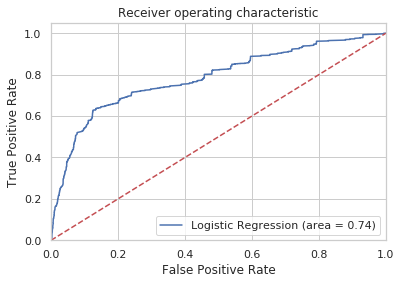

In [134]:
#    ROC Curve  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc  = roc_auc_score(y_test,logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
# Test code
k = 0
j = 0
for i in os_data_X:
   if i == 'y' :
      k =  k + 1
      exit
   else :
      j = j + 1
      print(j,' = ', i)
print('y= ' , k , ', not y = ', j)